In [1]:
import gc
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# Training set
ts_i = pd.read_csv('./training set/loandata_2.csv')
print(ts_i.shape)

/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1524098, 80)


In [3]:
ts_r = pd.read_csv('./training set/rejdata.csv')
print(ts_r.shape)

(14124451, 9)


In [4]:
i_select = ts_i[['loan_amnt','purpose','dti','emp_length','region']]
i_select['target'] = 1
i_select.head()

/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,loan_amnt,purpose,dti,emp_length,region,target
0,5000.0,credit_card,27.65,10+ years,AZ,1
1,2500.0,car,1.00,< 1 year,GA,1
2,2400.0,small_business,8.72,10+ years,IL,1
3,10000.0,other,20.00,10+ years,CA,1
4,3000.0,other,17.94,1 year,OR,1


In [5]:
r_select = ts_r[['Amount Requested','Loan Title','Debt-To-Income Ratio','Employment Length','State']]
r_select.columns = ['loan_amnt','purpose','dti','emp_length','region']
r_select['target'] = 0
r_select.head()

/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,loan_amnt,purpose,dti,emp_length,region,target
0,1000.0,Wedding Covered but No Honeymoon,10%,4 years,NM,0
1,1000.0,Consolidating Debt,10%,< 1 year,MA,0
2,11000.0,Want to consolidate my debt,10%,1 year,MD,0
3,6000.0,waksman,38.64%,< 1 year,MA,0
4,1500.0,mdrigo,9.43%,< 1 year,MD,0


In [6]:
import gc
del ts_i
del ts_r
gc.collect()

169

In [7]:
ts = pd.concat([i_select,r_select])
print(ts.shape)
del i_select
del r_select

(15648549, 6)


In [8]:
ts.head()

,loan_amnt,purpose,dti,emp_length,region,target
0,5000.0,credit_card,27.65,10+ years,AZ,1
1,2500.0,car,1,< 1 year,GA,1
2,2400.0,small_business,8.72,10+ years,IL,1
3,10000.0,other,20,10+ years,CA,1
4,3000.0,other,17.94,1 year,OR,1


In [9]:
# Preprocessing of 'Purpose'
rej = []
for i in ts['purpose']:
    if (i == 'debt_consolidation') | (i == 'Debt consolidation') | \
       (i == 'Debt Consolidation Loan') | (i == 'debt consolidation') | \
        (i == 'Consolidation') | (i == 'consolidation') | \
        (i == 'consolidate') | (i == 'Consolidation Loan') | \
        (i == 'Debt Consolidation'):
        rej.append('Debt Consolidation')
    elif (i == 'other') | \
         (i == 'Other'):
        rej.append('Other')
    elif (i == 'credit_card') | (i == 'Credit card refinancing') | \
         (i == 'Credit Card Refinance ') | (i == 'Credit Card Loan') | \
         (i == 'Credit Card Consolidation') | (i == 'credit card refinance') | \
         (i == 'Credit Card Payoff') | \
         (i == 'Credit Card'):
        rej.append('Credit Card')
    elif (i == 'Business Loan') | (i == 'Business Line Of Credit') | \
         (i == 'Small Business Loan') | (i == 'business') | \
         (i == 'small_business') | (i == 'small_business') |\
         (i == 'Business'):
        rej.append('Business')
    elif (i == 'vacation') | \
         (i == 'Vacation'):
        rej.append('Vacation')
    elif (i == 'home_improvement') | (i == 'house') | \
         (i == 'Home buying') | (i == 'home improvement') | \
         (i == 'Home improvement') | (i == 'Home Improvement Loan') | \
         (i == 'Home Improvement') :
        rej.append('Home Improvement')
    elif (i == 'car') | (i == 'Car financing') | \
         (i == 'Car'):
        rej.append('Car')
    elif (i == 'medical') | \
         (i == 'Medical expenses'):
        rej.append('Medical Expenses')
    elif (i == 'Major purchase') | (i == 'major_purchase'):
        rej.append('Major Purchase')
    elif (i == 'wedding') | (i == 'Wedding'):
        rej.append('Wedding')
    elif (i == 'Green lona') | (i == 'renewable_energy'):
        rej.append('Renewable Energy')
    elif (i == 'Personal') | (i == 'Personal loan') | \
         (i == 'personal') | (i == 'personal loan') | \
         (i == 'Personal Loan'):
        rej.append('Personal')
    elif (i == 'School') | (i == 'student loan') | \
         (i == 'Student Loan') | (i == 'Educational') | \
         (i == 'School Loan') | (i == 'educational') |\
         (i == 'Education'):
        rej.append('Education')
    elif (i == 'moving') | \
         (i == 'Moving and relocation'):
        rej.append('Moving and Relocation')
    elif (i == ' '):
        rej.append('WRONG')
    else: rej.append('WRONG')
ts['purpose'] = rej
ts['purpose'].value_counts()

Debt Consolidation       7485178
Other                    2110814
Credit Card              1949436
Home Improvement         1104722
Business                  616732
Car                       601011
Major Purchase            527297
Moving and Relocation     423361
Medical Expenses          417496
Vacation                  201292
WRONG                     149553
Renewable Energy           30685
Wedding                    20669
Personal                    5472
Education                   4831
Name: purpose, dtype: int64

In [10]:
# Preprocessing of 'emp_length'
ts['emp_length'] = ts['emp_length'].fillna(0)
year = []
for i in ts['emp_length']:
    i = str(i)
    temp = i.split(' y')
    if temp[0] == '10+':
        year.append(10)
    elif temp[0] == '< 1':
        year.append(0.5)
    elif temp[0] == 'n/a': 
        year.append(0)
    else: year.append(temp[0].rstrip())
ts['emp_length'] = year
ts['emp_length'].value_counts()

0.5    11122099
5       1919187
10       776833
0        607783
2        242484
1        209003
3        208714
4        154227
6        113973
8        105158
7        102534
9         86533
0            21
Name: emp_length, dtype: int64

In [11]:
# Preprocessing of 'dti'
import re
ts['dti'] = ts['dti'].fillna(0)
dti = []
for i in ts['dti']:
    i = str(i)
    if re.search('%', i):
        temp = float(i.rstrip('%'))/100
        if temp < 0:
            temp = 0
        dti.append(temp)
    else: 
        temp = float(i)
        if temp < 0:
            temp = 0
        dti.append(temp)
ts['dti'] = dti
ts['dti'].value_counts()

0.0000        1563309
1.0000         126153
99.9900         52663
0.0120          17188
0.0150          14867
0.0100          14632
0.0200          13312
0.0300          12795
0.0240          11365
0.0060          10538
0.0075          10099
0.0250           9573
0.0600           9495
0.0086           9152
0.0125           8468
0.0360           8033
0.1200           7548
0.0480           7402
0.0067           7155
0.0050           7126
0.0720           6694
0.0960           6530
0.0400           6437
0.0840           6407
0.1440           6346
0.0167           6290
0.0180           6264
0.1080           6249
0.1680           6231
0.1800           6224
               ...   
6.6770              1
6.1284              1
6.2018              1
6.6087              1
23844.0000          1
13.3720             1
5.8868              1
5.9257              1
6.0698              1
6.4105              1
18.2414             1
3.4575              1
19.9187             1
14.0946             1
419.4333  

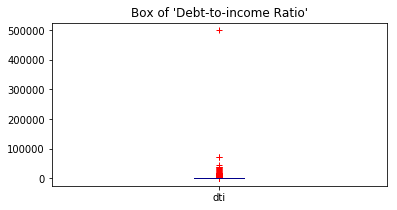

In [12]:
f, ax = plt.subplots(figsize=(6,3))
ax.set_title("Box of 'Debt-to-income Ratio'")
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
ts['dti'].plot.box(color=color, sym='r+')
plt.show()

In [13]:
# Outliers
co = ts['dti'].loc[(ts['dti']>50)]
# Replace
ts['dti'] = ts[['dti']].replace(co.values, 50)

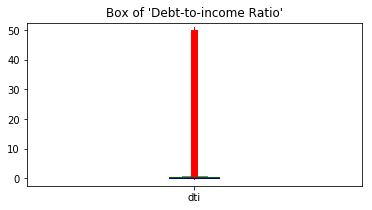

In [14]:
f, ax = plt.subplots(figsize=(6,3))
ax.set_title("Box of 'Debt-to-income Ratio'")
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
ts['dti'].plot.box(color=color, sym='r+')
plt.show()

In [15]:
# Missing Values

In [16]:
ts['region'].value_counts()

CA    1939813
TX    1376483
FL    1195732
NY    1192821
PA     593523
GA     583615
IL     578395
OH     564281
NJ     499200
NC     485249
VA     434404
MI     423008
MD     336722
AZ     329356
MA     321785
TN     307329
WA     286761
IN     277257
MO     274639
CO     274031
AL     273377
SC     250128
LA     236427
MN     211728
WI     206532
CT     196784
KY     196412
NV     192572
OK     171057
AR     161831
OR     160500
MS     132912
KS     130845
UT     101261
NM      92072
HI      90452
NH      67722
RI      64736
WV      51724
DE      51220
NE      49875
MT      41037
AK      36862
ME      32912
SD      32518
DC      32224
VT      30454
WY      30085
ID      26808
ND      20875
IA        160
Name: region, dtype: int64

In [17]:
ts['region'] = ts['region'].fillna('CA')
ts['purpose'] = ts['purpose'].fillna('WRONG')

In [18]:
ts['loan_amnt'] = ts['loan_amnt'].fillna(ts['loan_amnt'].mean())

In [19]:
ts_mv = ts.isnull().sum(axis=0).reset_index()
ts_mv.columns = ['column_name', 'no_missing']
ts_mv['missing_ratio'] = ts_mv['no_missing'] / ts.shape[0]
ts_mv.sort_values(by='no_missing',ascending=True, inplace=True)
ts_mv

,column_name,no_missing,missing_ratio
0,loan_amnt,0,0.0
1,purpose,0,0.0
2,dti,0,0.0
3,emp_length,0,0.0
4,region,0,0.0
5,target,0,0.0


In [20]:
# c = r_select['purpose'].value_counts().reset_index()
# c.columns = ['purpose_name', 'no']
# c.sort_values(by='no',ascending=True)

In [21]:
# iss = []
# for i in ts['purpose']:
#     if (i == 'debt_consolidation') | (i == 'Debt consolidation') | \
#        (i == 'Debt Consolidation Loan') | (i == 'debt consolidation') | \
#         (i == 'Consolidation') | (i == 'consolidation') | \
#         (i == 'consolidate') | (i == 'Consolidation Loan') | \
#         (i == 'Debt Consolidation'):
#         iss.append('Debt Consolidation')
#     elif (i == 'other') | \
#          (i == 'Other'):
#         iss.append('Other')
#     elif (i == 'credit_card') | (i == 'Credit card refinancing') | \
#          (i == 'Credit Card Refinance ') | (i == 'Credit Card Loan') | \
#          (i == 'Credit Card Consolidation') | (i == 'credit card refinance') | \
#          (i == 'Credit Card Payoff') | \
#          (i == 'Credit Card'):
#         iss.append('Credit Card')
#     elif (i == 'Business Loan') | (i == 'Business Line Of Credit') | \
#          (i == 'Small Business Loan') | (i == 'business') | \
#          (i == 'small_business') | (i == 'small_business') |\
#          (i == 'Business'):
#         iss.append('Business')
#     elif (i == 'vacation') | \
#          (i == 'Vacation'):
#         iss.append('Vacation')
#     elif (i == 'home_improvement') | (i == 'house') | \
#          (i == 'Home buying') | (i == 'home improvement') | \
#          (i == 'Home improvement') | (i == 'Home Improvement Loan') | \
#          (i == 'Home Improvement') :
#         iss.append('Home Improvement')
#     elif (i == 'car') | (i == 'Car financing') | \
#          (i == 'Car'):
#         iss.append('Car')
#     elif (i == 'medical') | \
#          (i == 'Medical expenses'):
#         iss.append('Medical Expenses')
#     elif (i == 'Major purchase') | (i == 'major_purchase'):
#         iss.append('Major Purchase')
#     elif (i == 'wedding') | (i == 'Wedding'):
#         iss.append('Wedding')
#     elif (i == 'Green lona') | (i == 'renewable_energy'):
#         iss.append('Renewable Energy')
#     elif (i == 'Personal') | (i == 'Personal loan') | \
#          (i == 'personal') | (i == 'personal loan') | \
#          (i == 'Personal Loan'):
#         iss.append('Personal')
#     elif (i == 'School') | (i == 'student loan') | \
#          (i == 'Student Loan') | (i == 'Educational') | \
#          (i == 'School Loan') | (i == 'educational') |\
#          (i == 'Education'):
#         iss.append('Education')
#     elif (i == 'moving') | \
#          (i == 'Moving and relocation'):
#         iss.append('Moving and Relocation')
#     elif (i == ' '):
#         iss.append('WRONG')
#     else: iss.append(i)
# ts['purpose'] = iss
# ts['purpose'].value_counts()

In [22]:
# year = []
# for i in r_select['emp_length']:
#     i = str(i)
#     temp = i.split('y')
#     if temp[0] == '10+':
#         year.append(10)
#     elif temp[0] == '< 1':
#         year.append(0.5)
#     elif temp[0] == 'n/a': 
#         year.append(0)
#     else: year.append(temp[0].rstrip())
# r_select['emp_length'] = year
# r_select['emp_length'].value_counts()

In [23]:
del rej
del year
del dti
del ts_mv
gc.collect()

5429

In [25]:
ts.to_csv('./training set/ts_raw.csv',index=None)

In [26]:
ts_mv = ts.isnull().sum(axis=0).reset_index()
ts_mv.columns = ['column_name', 'no_missing']
ts_mv['missing_ratio'] = ts_mv['no_missing'] / ts.shape[0]
ts_mv.sort_values(by='no_missing',ascending=True, inplace=True)
ts_mv

,column_name,no_missing,missing_ratio
0,loan_amnt,0,0.0
1,purpose,0,0.0
2,dti,0,0.0
3,emp_length,0,0.0
4,region,0,0.0
5,target,0,0.0


In [27]:
print(ts.shape)

(15648549, 6)


In [28]:
a = ts.dropna(axis=0,how='any')

In [29]:
print(a.shape)

(15648549, 6)


In [30]:
from sklearn.cross_validation import train_test_split
a_train, a_test = train_test_split(a, train_size=0.7)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
del ts
del a
gc.collect()

12

In [32]:
a_test.to_csv('./training set/clustering.csv',index=None)

In [33]:
a_test.shape

(4694565, 6)